<a href="https://colab.research.google.com/github/jvataidee/SpatialDataSience/blob/master/regrassao_temp_ndvi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img src="https://static.wixstatic.com/media/bdd7cb_6ecb6c85550043f090237e5943d2647c~mv2.png/v1/fill/w_417,h_88,al_c,q_85,usm_0.66_1.00_0.01/Ativo%2023-8.webp" height="80px"></p>

#Correlação entre dados de Tempretura e NDVI.
Este *DataSet* foi retirado de manipulações de imagens de satelite, onde foram gerados o NDVI e Temperatura Superficias. Imagens essas referente a Zona Norte de Natal/RN.

O NDVI que mostra o indice de vegetação de uma área, consequentimente regiões de água e urbanas. Mais sobre [NDVI](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index).

</P>
$$
NDVI
$$
<p align="center"><img src="https://static.wixstatic.com/media/bdd7cb_dfa793025dc84d309001cbad1bb48aeb~mv2.png" height="300px"></p>

Já o modelo de Temperatura, apresenta dados de temperatura superficial em gaus Celsius. Mais sobre [Temperatura superficial](http://www.gisandbeers.com/mapas-de-temperatura-superficial-diaria-con-sentinel-3/).

$$
TEMPERATURA
$$
<p align="center"><img src="https://static.wixstatic.com/media/bdd7cb_48668a65c559410baccd244123381b2a~mv2.png" height="325px"></p>

Sendo assim, foram coletados **2696** pontos de amostras aleatoriamente, coletando assim os valores das celulas. Desta forma, presente pesquisa tem como objetivo analisar a correlação entre eles, identificando então se as mudanças de temperaturas estão relacionadas ao indice de vegetação. Todos dados utilizandos estão pode ser vistos em [DataSet](https://github.com/jvataidee/corr_ndvi_temp).



In [ ]:
import pandas as pd
import numpy as np
import math as mt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from yellowbrick.regressor import ResidualsPlot
from sklearn.preprocessing import Normalizer

# configurar a visualização
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Estatistica Descritiva

In [ ]:
df = 'https://raw.githubusercontent.com/jvataidee/corr_ndvi_temp/master/point%20-%20Copy.csv'
df = pd.read_csv(df)

In [ ]:
#retirando a coluna do ID
df.head()

,TEMPERATURA,NDVI
0,15,0.15196
1,15,0.19735
2,15,0.20668
3,15,0.31235
4,14,0.19688


In [ ]:
df.tail()

,TEMPERATURA,NDVI
618,2,0.01546
619,2,0.12937
620,2,0.18842
621,2,0.27892
622,1,0.12625


In [ ]:
df.describe()

,TEMPERATURA,NDVI
count,623.000000,623.000000
mean,9.460674,0.198178
std,2.822392,0.126395
min,1.000000,-0.101850
25%,7.000000,0.135060
50%,10.000000,0.180430
75%,12.000000,0.265690
max,15.000000,0.548610


#Normalização dos dados

In [ ]:
scaler = Normalizer()
data = scaler.fit_transform(df)
data = pd.DataFrame(data)

In [ ]:
data

,0,1
0,0.999949,0.010130
1,0.999913,0.013156
2,0.999905,0.013777
3,0.999783,0.020819
4,0.999901,0.014061
...,...,...
618,0.999970,0.007730
619,0.997914,0.064550
620,0.995592,0.093795
621,0.990415,0.138123


In [ ]:
data.describe()

,0,1
count,623.000000,623.000000
mean,0.999527,0.022971
std,0.000842,0.020441
min,0.990415,-0.019626
25%,0.999545,0.012645
50%,0.999860,0.016555
75%,0.999916,0.030165
max,1.000000,0.138123


In [ ]:
correlacao = data.corr()
correlacao

,0,1
0,1.000000,-0.889302
1,-0.889302,1.000000


## Regressção Linear

O processo de regressão linear, foi realizado não para predição mas para linearização dos dados.

In [ ]:
#Separando a base de dados
temperatura = data.iloc[:,0].values
ndvi = data.iloc[:,1].values

In [ ]:
X = temperatura.reshape(-1, 1)
y = ndvi.reshape(-1, 1)

In [ ]:
modelo =  LinearRegression(normalize=True)
modelo.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
modelo.intercept_

array([21.61137643])

In [ ]:
#Coeficiente de correlacao
modelo.coef_

array([[-21.59861933]])

In [ ]:
score = modelo.score(X,y)
score

0.7908572256111477

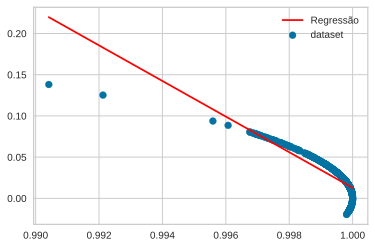

In [ ]:
plt.scatter(X,y, label =  "dataset")
plt.plot(X, modelo.predict(X), color = "red", label = "Regressão");
plt.legend()
plt.savefig('foo.png')

###Residual do modelo

O Redidual refere-se ou valor da variabilidade não explicada, desta forma quanto menor for seu valor indica que o modelo está mostrando bons resultados.

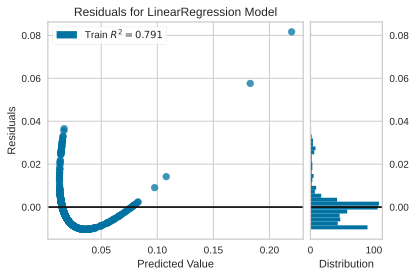

In [ ]:
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, y)
visualizador.poof();

##Regressão Polinomial

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import linear_model

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_teste.sort(axis=0)

In [ ]:
poly_model = make_pipeline(PolynomialFeatures(degree=3), linear_model.LinearRegression())
poly_model.fit(X_treino, y_treino)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
linear_model_1 = linear_model.LinearRegression()
linear_model_1.fit(X_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#previsões
y_poly_test = poly_model.predict(y_teste)
y_linear_test = linear_model_1.predict(y_teste)

In [ ]:
x_poly_test2 = poly_model.predict(X_teste)
x_linear_test2 = linear_model_1.predict(X_teste)

In [ ]:
#Métricas
print("MAE", mean_absolute_error(x_poly_test2, X_teste))
print("MSE", mean_squared_error(x_poly_test2, X_teste))
print("RMSE", np.sqrt(mean_absolute_error(x_poly_test2, X_teste)))

MAE 0.9778607848138599
MSE 0.9568682009626152
RMSE 0.98886843655456


In [ ]:
#Métricas
print("MAE", mean_absolute_error(y_poly_test, y_teste))
print("MSE", mean_squared_error(y_poly_test, y_teste))
print("RMSE", np.sqrt(mean_absolute_error(y_poly_test, y_teste)))

MAE 850843.8537514828
MSE 726485032828.7753
RMSE 922.4119761535421


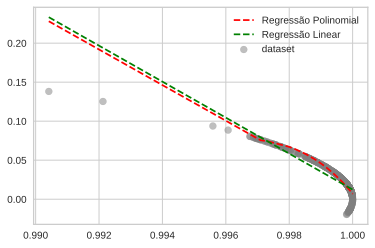

In [ ]:
fig = plt.figure()
ax = plt.axes()

plt.scatter(X,y,alpha=0.5,color ="gray",label = "dataset")
ax.plot(X_teste,x_poly_test2, color='red', label='Regressão Polinomial',linestyle = "dashed")
ax.plot(X_teste, x_linear_test2, color='green', label='Regressão Linear',linestyle = "dashed")
plt.legend()
plt.show()

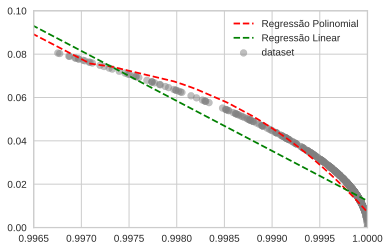

In [ ]:
fig = plt.figure()
ax = plt.axes()

plt.scatter(X,y,alpha=0.5,color ="gray",label = "dataset")
ax.plot(X_teste,x_poly_test2, color='red', label='Regressão Polinomial',linestyle = "dashed")
ax.plot(X_teste, x_linear_test2, color='green', label='Regressão Linear',linestyle = "dashed")
plt.xlim(0.9965, 1.)
plt.ylim(0, 0.10)
plt.legend()
plt.show()

###Residual

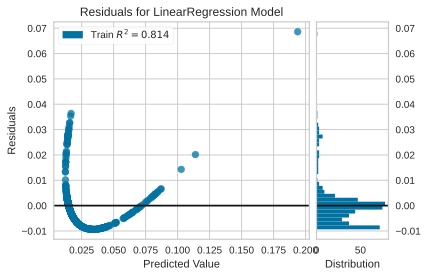

In [ ]:
visualizador = ResidualsPlot(linear_model_1)
visualizador.fit(X_treino, y_treino)
visualizador.poof();